In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

# Define Figure

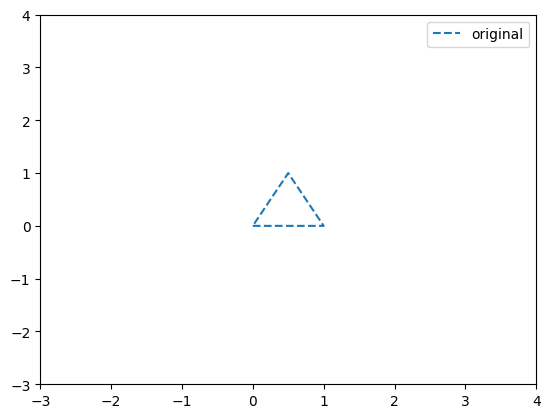

In [18]:
figure = np.array([
    [0, 0, 1],
    [1, 0, 1],
    [0.5, 1, 1],
    [0, 0, 1]
]).T   # columns = points

plt.figure()
plt.plot(figure[0], figure[1], '--', label="original")
plt.xlim(-3, 4)
plt.ylim(-3, 4)
plt.legend()

# Transforms

In [10]:
def move(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotate(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

def scale(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])



# Animation

In [16]:
frames = []
os.makedirs("frames", exist_ok=True)

n_frames = 60

for i in range(n_frames):
    t = i / n_frames

    theta = 2 * np.pi * t          # rotatesa
    s = 1 + 0.5 * np.sin(2*np.pi*t)  # beats (escala)
    tx = 2 * t                      # moves x
    ty = np.sin(2*np.pi*t)          # moves y

    T = move(tx, ty) @ rotate(theta) @ scale(s, s)

    transformation = T @ figure

    plt.figure()
    plt.plot(figure[0], figure[1], '--', label="original")
    plt.plot(transformation[0], transformation[1], label="transformed")
    plt.xlim(-3, 4)
    plt.ylim(-3, 4)
    plt.legend()

    filename = f"frames/frame_{i}.png"
    plt.savefig(filename)
    plt.close()

    frames.append(imageio.imread(filename))

# Generate GIF

In [17]:
imageio.mimsave("animacion.gif", frames, fps=15)